<a href="https://colab.research.google.com/github/hammaad2002/Solar-Irradiance-Forecasting/blob/main/gru_model_for_solar_irradiance_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!git clone https://github.com/hammaad2002/Solar-Irradiance-Forecasting.git
!pip install torchmetrics

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from torchmetrics import MeanAbsoluteError, MeanAbsolutePercentageError
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
# Assuming your DataFrame is named 'df'
desired_starting_row = 3
df = pd.read_csv('/kaggle/working/Solar-Irradiance-Forecasting/Solar Irradiance Dataset/2017Solar.csv', skiprows=desired_starting_row - 1)
df

,Year,Month,Day,Hour,Minute,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,2017,1,1,0,0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,2017,1,1,0,15,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,2017,1,1,0,30,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,2017,1,1,0,45,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,2017,1,1,1,0,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2017,12,31,22,45,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,2017,12,31,23,0,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,2017,12,31,23,15,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,2017,12,31,23,30,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
workingDf = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis = 1)
workingDf

,GHI,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,Precipitable Water
0,0,10.6,-17.4,12.29,949,103,0.7,0.7
1,0,10.5,-17.4,12.37,949,107,0.7,0.7
2,0,10.4,-17.4,12.45,949,111,0.7,0.7
3,0,10.2,-17.3,12.74,949,115,0.7,0.7
4,0,10.1,-17.3,12.83,949,120,0.7,0.7
...,...,...,...,...,...,...,...,...
35035,0,11.2,-17.4,11.78,950,81,0.8,0.7
35036,0,11.1,-17.4,11.86,950,85,0.8,0.7
35037,0,11.0,-17.4,11.93,949,89,0.7,0.7
35038,0,10.9,-17.4,12.01,949,94,0.7,0.7


In [ ]:
columns = workingDf.columns.tolist()
columns[0], columns[-1] = columns[-1], columns[0]
workingDf = workingDf[columns]
workingDf

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.7,10.6,-17.4,12.29,949,103,0.7,0
1,0.7,10.5,-17.4,12.37,949,107,0.7,0
2,0.7,10.4,-17.4,12.45,949,111,0.7,0
3,0.7,10.2,-17.3,12.74,949,115,0.7,0
4,0.7,10.1,-17.3,12.83,949,120,0.7,0
...,...,...,...,...,...,...,...,...
35035,0.7,11.2,-17.4,11.78,950,81,0.8,0
35036,0.7,11.1,-17.4,11.86,950,85,0.8,0
35037,0.7,11.0,-17.4,11.93,949,89,0.7,0
35038,0.7,10.9,-17.4,12.01,949,94,0.7,0


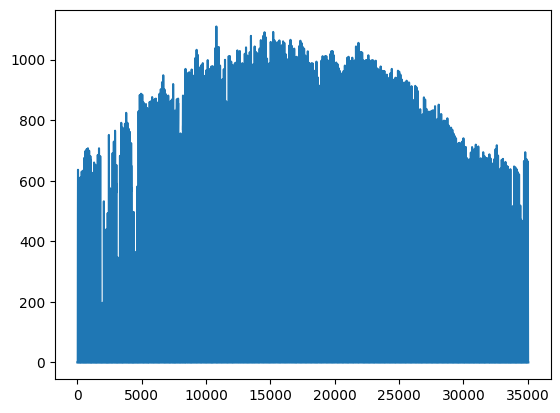

In [ ]:
target = workingDf['GHI']
target.plot()
plt.show()

In [ ]:
random_day = random.randint(1, 365)
random_day

43

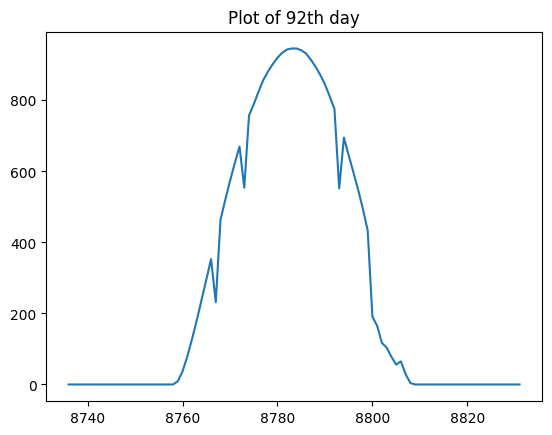

In [ ]:
random_day = random.randint(4, 365) # starting from 4th day so that I can write "th" in the title :)
target = workingDf['GHI'][(random_day-1)*96:(random_day*96)]
target.plot()
plt.title(str(f"Plot of {random_day}th day"))
plt.show()

In [ ]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(workingDf), columns=workingDf.columns)
df_normalized.head(10) # this normalizes the data in between range [0, 1]

,Precipitable Water,Temperature,Dew Point,Relative Humidity,Pressure,Wind Direction,Wind Speed,GHI
0,0.166667,0.291743,0.236287,0.122209,0.633333,0.286111,0.043860,0.0
1,0.166667,0.289908,0.236287,0.123159,0.633333,0.297222,0.043860,0.0
2,0.166667,0.288073,0.236287,0.124109,0.633333,0.308333,0.043860,0.0
3,0.166667,0.284404,0.238397,0.127553,0.633333,0.319444,0.043860,0.0
4,0.166667,0.282569,0.238397,0.128622,0.633333,0.333333,0.043860,0.0
5,0.166667,0.280734,0.238397,0.129572,0.633333,0.344444,0.035088,0.0
6,0.166667,0.278899,0.238397,0.130641,0.633333,0.355556,0.035088,0.0
7,0.166667,0.277064,0.240506,0.132660,0.633333,0.366667,0.035088,0.0
8,0.166667,0.275229,0.240506,0.133729,0.633333,0.377778,0.035088,0.0
9,0.166667,0.273394,0.240506,0.134679,0.633333,0.394444,0.035088,0.0


In [ ]:
class simpleGRU(nn.Module):
    def __init__(self, features = 8, prediction = 1, window = 288, horizon = 1):
        super(simpleGRU, self).__init__()

        self.layer1 = nn.GRU(input_size = 8, hidden_size = 128, 
                             num_layers = 1, bias = True, 
                             batch_first = True, dropout = 0.2)
        
        self.activation1 = nn.Tanh()
        
        self.layer2 = nn.GRU(input_size = 128, hidden_size = 64,
                             num_layers = 1, bias = True,
                             batch_first = True, dropout = 0.2)

        self.activation2 = nn.Tanh()
        
        self.layer3 = nn.GRU(input_size = 64, hidden_size = 32,
                             num_layers = 1, bias = True,
                             batch_first = True, dropout = 0.2)
        
        self.activation3 = nn.Tanh()
        
        self.layer4 = nn.Linear(in_features = 32, out_features = 1)
       
        self.activation4 = nn.GELU()
        
        self.drop = nn.Dropout(p=0.5)

        self.layer5 = nn.Linear(in_features = window, out_features = horizon)

        self.activation5 = nn.GELU()

    def forward(self, x):

        x = self.layer1(x)
        x = self.activation1(x[0])
        x = self.layer2(x)
        x = self.activation2(x[0])
        x = self.layer3(x)
        x = self.activation3(x[0])
        x = self.layer4(x)
        x = self.activation4(x)
        x = self.drop(x)
        x = x.transpose(1, 2)
        x = self.layer5(x)
        x = self.activation5(x)
        return x

In [ ]:
per_day_readings = 4 * 24
window_length = 3 * per_day_readings    # we want our model to look back at the data of 3 days
horizon = 1                             # and then predict the next 15 minute reading

In [ ]:
df = df_normalized.values
stride = 1
x = []
y = []
for i in tqdm(range(0, len(df) - window_length, stride)):
    x.append(df[i:window_length+i, : ]) #GHI included but its past values only
    y.append(df[window_length+i,-1])                  #next GHI value

  0%|          | 0/34752 [00:00<?, ?it/s]

In [ ]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(34752, 288, 8)
(34752,)


In [ ]:
x[45]

array([[0.36111111, 0.55779817, 0.50843882, ..., 0.71388889, 0.09649123,
        0.56176736],
       [0.36111111, 0.56330275, 0.50632911, ..., 0.73888889, 0.11403509,
        0.56988278],
       [0.36111111, 0.56697248, 0.50632911, ..., 0.76111111, 0.12280702,
        0.57348963],
       ...,
       [0.33333333, 0.46238532, 0.66666667, ..., 0.45277778, 0.13157895,
        0.50405771],
       [0.33333333, 0.46788991, 0.66666667, ..., 0.66944444, 0.13157895,
        0.52569883],
       [0.33333333, 0.47522936, 0.66666667, ..., 0.88888889, 0.14035088,
        0.54102795]])

In [ ]:
y[44]

0.5410279531109107

In [ ]:
# splitting our dataset into two parts one will be training set and the other will be testing set
# Lets store last 5 days as our test set
x_train = x[:-per_day_readings*5]
y_train = y[:-per_day_readings*5]
x_test  = x[len(y) - per_day_readings*5:]
y_test  = y[len(y) - per_day_readings*5:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(34272, 288, 8)
(34272,)
(480, 288, 8)
(480,)


In [ ]:
# finding the device of our environment
device = 'cpu' if not torch.cuda.is_available() else 'cuda'

In [ ]:
# converting our dataset to pytorch tensors for forwarding passing
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)

In [ ]:
amp = True # If we want the model to be trained faster

In [ ]:
# Now we towards training the model
if amp:
    use_amp = True
    scaler = torch.cuda.amp.GradScaler(enabled=use_amp)

In [ ]:
set_epochs = 50

In [ ]:
# initializing the model first before training
features = 8
prediction = 1

modelGRU = simpleGRU(features = features, prediction = prediction, 
                  window = window_length, horizon = horizon)

modelGRU = modelGRU.to(device)

In [ ]:
modelGRU

simpleGRU(
  (layer1): GRU(8, 128, batch_first=True, dropout=0.2)
  (activation1): Tanh()
  (layer2): GRU(128, 64, batch_first=True, dropout=0.2)
  (activation2): Tanh()
  (layer3): GRU(64, 32, batch_first=True, dropout=0.2)
  (activation3): Tanh()
  (layer4): Linear(in_features=32, out_features=1, bias=True)
  (activation4): GELU(approximate='none')
  (drop): Dropout(p=0.5, inplace=False)
  (layer5): Linear(in_features=288, out_features=1, bias=True)
  (activation5): GELU(approximate='none')
)

In [ ]:
# Lets define loss function and optimizer
criterion = MeanAbsoluteError().to(device)                         # MAE
metricc = MeanAbsolutePercentageError().to(device)                 # MAPE metric
optimizer = optim.AdamW(modelGRU.parameters(), lr=1e-4, weight_decay= 1e-5)               # Adam  TRY THIS : , 

num_epochs = set_epochs
batch_size = 128

loss_info_GRU = []
metric_info_GRU = []

for epoch in tqdm(range(num_epochs)):

    running_loss = 0.0                                             # MAE Loss
    running_metric = 0.0                                           # MAPE metric
    
    for i in tqdm(range(0, len(x_train_tensor), batch_size), desc=f"Epoch {epoch+1}"):

        # Get batch of inputs and targets
        batch_x = x_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        # Reshape input tensor
        batch_x = batch_x.view(-1, window_length, features)
        
        if amp:

            with torch.autocast(device_type= 'cuda', dtype=torch.float16, enabled=use_amp):
                # Forward pass
                outputs = modelGRU(batch_x)
                
                if batch_size == 1:
                    loss = criterion(outputs.view(-1), torch.tensor([batch_y]))
                    metric = metricc(outputs.view(-1), torch.tensor([batch_y]))

                else:
                    loss = criterion(outputs.view(-1), batch_y)
                    metric = metricc(outputs.view(-1), batch_y)
            
            # Backward pass and optimization
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update() 

        else:       

            # Forward pass
            outputs = modelGRU(batch_x)

            if batch_size == 1:
                loss = criterion(outputs.view(-1), torch.tensor([batch_y]))
                metric = metricc(outputs.view(-1), torch.tensor([batch_y]))

            else:
                loss = criterion(outputs.view(-1), batch_y)
                metric = metricc(outputs.view(-1), batch_y)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

        # Zero the parameter gradients
        optimizer.zero_grad(set_to_none=True)

        running_loss += loss.item()
        running_metric += metric.item()

    # Calculate epoch loss and metric
    epoch_loss = running_loss / (len(x_train) / batch_size)
    epoch_metric = running_metric / (len(x_train) / batch_size)
    loss_info_GRU.append(epoch_loss)
    metric_info_GRU.append(epoch_metric)
    print("-"*25, f"Epoch {epoch + 1}","-"*25)
    print(f"Epoch {epoch+1} MAE loss: {epoch_loss:.9f}")
    print(f"Epoch {epoch+1} MAPE metric: {epoch_metric:.9f}")

print("Training complete!")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 1 -------------------------
Epoch 1 MAE loss: 0.162225962
Epoch 1 MAPE metric: 20428.660902121


Epoch 2:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 2 -------------------------
Epoch 2 MAE loss: 0.081248167
Epoch 2 MAPE metric: 20786.845569999


Epoch 3:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 3 -------------------------
Epoch 3 MAE loss: 0.072146793
Epoch 3 MAPE metric: 18201.650673290


Epoch 4:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 4 -------------------------
Epoch 4 MAE loss: 0.066944515
Epoch 4 MAPE metric: 17095.084146680


Epoch 5:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 5 -------------------------
Epoch 5 MAE loss: 0.064908672
Epoch 5 MAPE metric: 16462.163685005


Epoch 6:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 6 -------------------------
Epoch 6 MAE loss: 0.062563875
Epoch 6 MAPE metric: 16112.457452512


Epoch 7:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 7 -------------------------
Epoch 7 MAE loss: 0.060590880
Epoch 7 MAPE metric: 15566.198153741


Epoch 8:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 8 -------------------------
Epoch 8 MAE loss: 0.059280250
Epoch 8 MAPE metric: 15249.455896942


Epoch 9:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 9 -------------------------
Epoch 9 MAE loss: 0.057884699
Epoch 9 MAPE metric: 14979.443514385


Epoch 10:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 10 -------------------------
Epoch 10 MAE loss: 0.057590376
Epoch 10 MAPE metric: 14761.047516923


Epoch 11:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 11 -------------------------
Epoch 11 MAE loss: 0.056965373
Epoch 11 MAPE metric: 14507.541757849


Epoch 12:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 12 -------------------------
Epoch 12 MAE loss: 0.055949270
Epoch 12 MAPE metric: 14410.860594107


Epoch 13:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 13 -------------------------
Epoch 13 MAE loss: 0.056196679
Epoch 13 MAPE metric: 14700.948578650


Epoch 14:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 14 -------------------------
Epoch 14 MAE loss: 0.056704939
Epoch 14 MAPE metric: 15261.072526406


Epoch 15:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 15 -------------------------
Epoch 15 MAE loss: 0.056704603
Epoch 15 MAPE metric: 15212.295080532


Epoch 16:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 16 -------------------------
Epoch 16 MAE loss: 0.057448842
Epoch 16 MAPE metric: 15525.297237906


Epoch 17:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 17 -------------------------
Epoch 17 MAE loss: 0.057572782
Epoch 17 MAPE metric: 15706.927665076


Epoch 18:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 18 -------------------------
Epoch 18 MAE loss: 0.058105814
Epoch 18 MAPE metric: 15925.617457400


Epoch 19:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 19 -------------------------
Epoch 19 MAE loss: 0.058954108
Epoch 19 MAPE metric: 16284.226024524


Epoch 20:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 20 -------------------------
Epoch 20 MAE loss: 0.058592803
Epoch 20 MAPE metric: 16654.307428440


Epoch 21:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 21 -------------------------
Epoch 21 MAE loss: 0.058389121
Epoch 21 MAPE metric: 16616.330953475


Epoch 22:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 22 -------------------------
Epoch 22 MAE loss: 0.057985849
Epoch 22 MAPE metric: 16046.746770323


Epoch 23:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 23 -------------------------
Epoch 23 MAE loss: 0.056900472
Epoch 23 MAPE metric: 15706.605663880


Epoch 24:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 24 -------------------------
Epoch 24 MAE loss: 0.056757229
Epoch 24 MAPE metric: 15066.811557175


Epoch 25:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 25 -------------------------
Epoch 25 MAE loss: 0.055170604
Epoch 25 MAPE metric: 14042.249064470


Epoch 26:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 26 -------------------------
Epoch 26 MAE loss: 0.052736463
Epoch 26 MAPE metric: 12565.473573544


Epoch 27:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 27 -------------------------
Epoch 27 MAE loss: 0.051063337
Epoch 27 MAPE metric: 11454.785878414


Epoch 28:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 28 -------------------------
Epoch 28 MAE loss: 0.049260027
Epoch 28 MAPE metric: 10096.462533190


Epoch 29:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 29 -------------------------
Epoch 29 MAE loss: 0.047220893
Epoch 29 MAPE metric: 8901.293346245


Epoch 30:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 30 -------------------------
Epoch 30 MAE loss: 0.045711206
Epoch 30 MAPE metric: 7867.283977263


Epoch 31:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 31 -------------------------
Epoch 31 MAE loss: 0.044432730
Epoch 31 MAPE metric: 7360.933620193


Epoch 32:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 32 -------------------------
Epoch 32 MAE loss: 0.043306001
Epoch 32 MAPE metric: 6983.192365488


Epoch 33:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 33 -------------------------
Epoch 33 MAE loss: 0.043041639
Epoch 33 MAPE metric: 6850.805911167


Epoch 34:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 34 -------------------------
Epoch 34 MAE loss: 0.042970961
Epoch 34 MAPE metric: 6790.331331882


Epoch 35:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 35 -------------------------
Epoch 35 MAE loss: 0.042970970
Epoch 35 MAPE metric: 6605.940271030


Epoch 36:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 36 -------------------------
Epoch 36 MAE loss: 0.042419224
Epoch 36 MAPE metric: 6679.520326360


Epoch 37:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 37 -------------------------
Epoch 37 MAE loss: 0.042719980
Epoch 37 MAPE metric: 6627.449205073


Epoch 38:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 38 -------------------------
Epoch 38 MAE loss: 0.042400511
Epoch 38 MAPE metric: 6699.513913508


Epoch 39:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 39 -------------------------
Epoch 39 MAE loss: 0.042102014
Epoch 39 MAPE metric: 6695.521990437


Epoch 40:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 40 -------------------------
Epoch 40 MAE loss: 0.042014645
Epoch 40 MAPE metric: 6750.235140020


Epoch 41:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 41 -------------------------
Epoch 41 MAE loss: 0.042175446
Epoch 41 MAPE metric: 6686.411544045


Epoch 42:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 42 -------------------------
Epoch 42 MAE loss: 0.041724778
Epoch 42 MAPE metric: 6780.942454847


Epoch 43:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 43 -------------------------
Epoch 43 MAE loss: 0.041533140
Epoch 43 MAPE metric: 6679.186323748


Epoch 44:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 44 -------------------------
Epoch 44 MAE loss: 0.041249585
Epoch 44 MAPE metric: 6650.349530046


Epoch 45:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 45 -------------------------
Epoch 45 MAE loss: 0.041623604
Epoch 45 MAPE metric: 6712.219064579


Epoch 46:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 46 -------------------------
Epoch 46 MAE loss: 0.041602595
Epoch 46 MAPE metric: 6631.963181497


Epoch 47:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 47 -------------------------
Epoch 47 MAE loss: 0.041301535
Epoch 47 MAPE metric: 6642.544468699


Epoch 48:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 48 -------------------------
Epoch 48 MAE loss: 0.041396024
Epoch 48 MAPE metric: 6718.679237971


Epoch 49:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 49 -------------------------
Epoch 49 MAE loss: 0.041079854
Epoch 49 MAPE metric: 6796.313449208


Epoch 50:   0%|          | 0/268 [00:00<?, ?it/s]

------------------------- Epoch 50 -------------------------
Epoch 50 MAE loss: 0.041253464
Epoch 50 MAPE metric: 6791.770881660
Training complete!


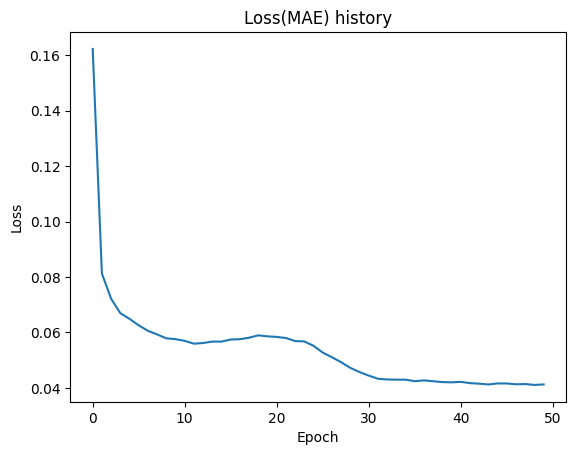

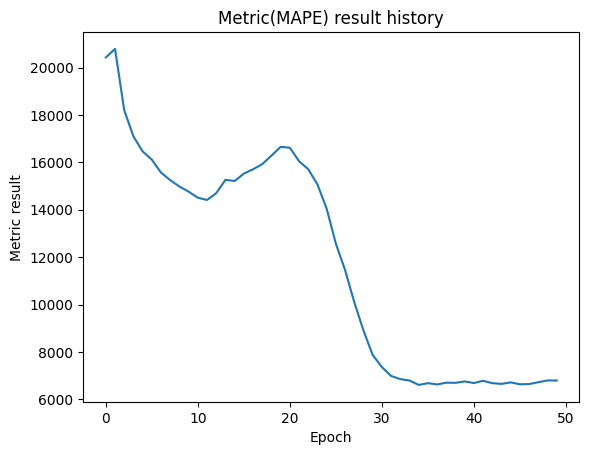

In [ ]:
# Plot the history of loss
plt.plot(range(num_epochs), loss_info_GRU)
plt.title('Loss(MAE) history')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the history of metric result
plt.plot(range(num_epochs), metric_info_GRU)
plt.title('Metric(MAPE) result history')
plt.xlabel('Epoch')
plt.ylabel('Metric result')
plt.show()

In [ ]:
# Testing model's performance on our dataset
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [ ]:
running_loss = 0.0                                             # MAE Loss
running_metric = 0.0                                           # MAPE metric

batch_size = 1
modPred_GRU = []
GroundTruth = []
for i in tqdm(range(0, len(x_test_tensor), batch_size), desc=f"Train set inference ..."):
  
        # Get batch of inputs and targets
        batch_x = x_test_tensor[i:i+batch_size]
        batch_y = y_test_tensor[i:i+batch_size]
        
        # Reshape input tensor
        batch_x = batch_x.view(-1, window_length, features)

        # Forward pass
        with torch.inference_mode():
            modelGRU.eval()
            outputs = modelGRU(batch_x)

        if batch_size == 1:
            loss = criterion(outputs.view(-1).to(outputs.device), batch_y.to(outputs.device))
            metric = metricc(outputs.view(-1).to(outputs.device), batch_y.to(outputs.device))
            if outputs.view(-1).cpu().detach() < 0:
                modPred_GRU.append(0)
            else: 
                modPred_GRU.append(outputs.view(-1).cpu().detach())
            GroundTruth.append(torch.tensor([batch_y]).cpu().detach())
        
        else:
            loss = criterion(outputs.view(-1), batch_y)
            metric = metricc(outputs.view(-1), batch_y)
            if outputs.view(-1).cpu().detach() < 0:
                modPred_GRU.append(0)
            else: 
                modPred_GRU.append(outputs.view(-1).cpu().detach())
            GroundTruth.append(batch_y.cpu().detach())
          
        running_loss += loss.item()
        running_metric += metric.item()

test_loss = running_loss / (len(x_train) / batch_size)
test_metric = running_metric / (len(x_train) / batch_size)
print("-"*25, "TEST LOSS", "-"*25)
print(f"Test MAE loss: {test_loss:.9f}")
print(f"Test MAPE metric: {test_metric:.9f}")

Train set inference ...:   0%|          | 0/480 [00:00<?, ?it/s]

------------------------- TEST LOSS -------------------------
Test MAE loss: 0.000441822
Test MAPE metric: 54.700869413


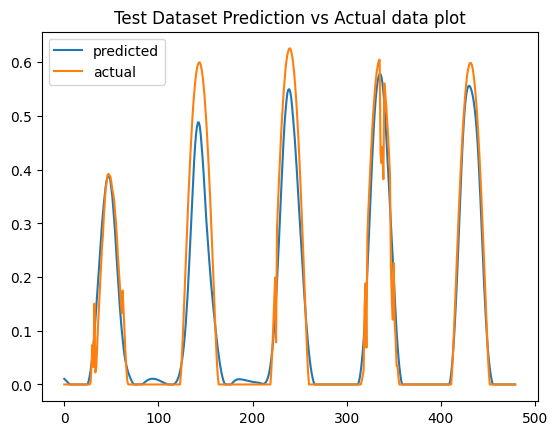

In [ ]:
plt.plot(modPred_GRU)
plt.plot(GroundTruth)
plt.title('Test Dataset Prediction vs Actual data plot')
plt.legend(['predicted', 'actual'])
plt.show()